In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import os

In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import numpy as np
import os

# Define paths
data_path = "/Users/gurpreetsingh/Desktop/Hackathon/Data"
test_folder = "/Users/gurpreetsingh/Desktop/Hackathon/Test_Dataset_JPG"

# Data Preprocessing and Loading
data_generator = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_data = data_generator.flow_from_directory(
    data_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_data = data_generator.flow_from_directory(
    data_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Print classes to verify the correct number
print("Classes found:", train_data.class_indices)

# Build CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile and Train the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(
    train_data,
    validation_data=validation_data,
    epochs=30
)

# Save the Model
####
#####
######
#######
model_path = "asl_digit_classifier.keras"
model.save('asl_digit_classifier.keras')
print(f"Model saved at {model_path}")


# Load the Model for Prediction (if needed)
model = tf.keras.models.load_model("asl_digit_classifier.keras")


# Function to Predict a Single Image
def predict_image(img_path):
    from tensorflow.keras.preprocessing import image

    img = image.load_img(img_path, target_size=(64, 64))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    predictions = model.predict(img_array)
    predicted_class = tf.argmax(predictions[0]).numpy()  # Convert to integer for readability
    return predicted_class

# Example Prediction on a Single Image
'''test_image_path = "/Users/gurpreetsingh/Desktop/Hackathon/Test_Dataset_JPG/7.jpg"  # Ensure this image exists
predicted_class = predict_image(test_image_path)
print(f"Predicted Class for {test_image_path}: {predicted_class}")'''

# Batch Prediction on Directory of Test Images
print("\nBatch Predictions for Images in Test Folder:")
for idx, filename in enumerate(os.listdir(test_folder)):
    if filename.lower().endswith(".jpg"):
        img_path = os.path.join(test_folder, filename)
        predicted_class = predict_image(img_path)
        print(f"{idx + 1}. Image: {filename} - Predicted Class: {predicted_class}")


Found 1653 images belonging to 10 classes.
Found 409 images belonging to 10 classes.
Classes found: {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9}


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 145ms/step - accuracy: 0.1048 - loss: 2.3330 - val_accuracy: 0.1002 - val_loss: 2.3027
Epoch 2/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - accuracy: 0.1159 - loss: 2.3029 - val_accuracy: 0.1002 - val_loss: 2.3025
Epoch 3/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 122ms/step - accuracy: 0.0908 - loss: 2.3026 - val_accuracy: 0.1002 - val_loss: 2.3025
Epoch 4/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 146ms/step - accuracy: 0.1022 - loss: 2.3033 - val_accuracy: 0.1002 - val_loss: 2.3026
Epoch 5/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 123ms/step - accuracy: 0.1057 - loss: 2.3026 - val_accuracy: 0.1002 - val_loss: 2.3025
Epoch 6/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 0.0890 - loss: 2.3033 - val_accuracy: 0.1002 - val_loss: 2.3017
Epoch 7/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - accuracy: 0.1098 - loss: 2.3041 - val_accuracy: 0.1027 - val_loss: 2.3016
Epoch 8/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 169ms/step - accuracy: 0.1042 - loss: 2.3023 - val_accuracy: 0

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x2cd1a3fb0>

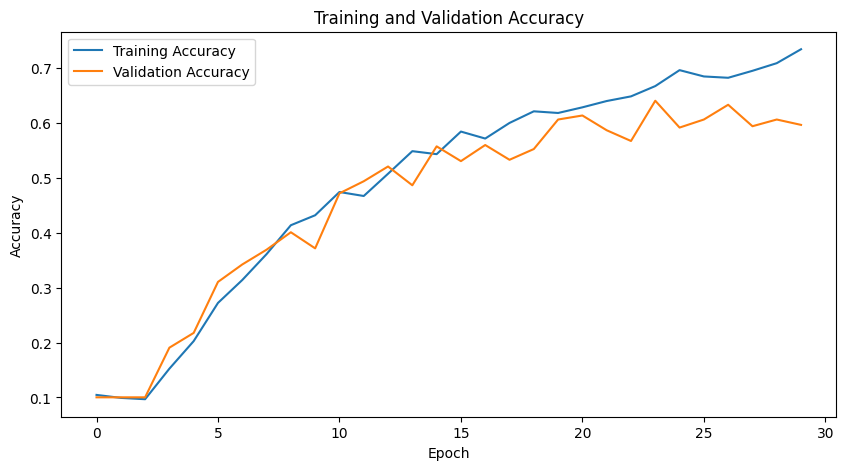

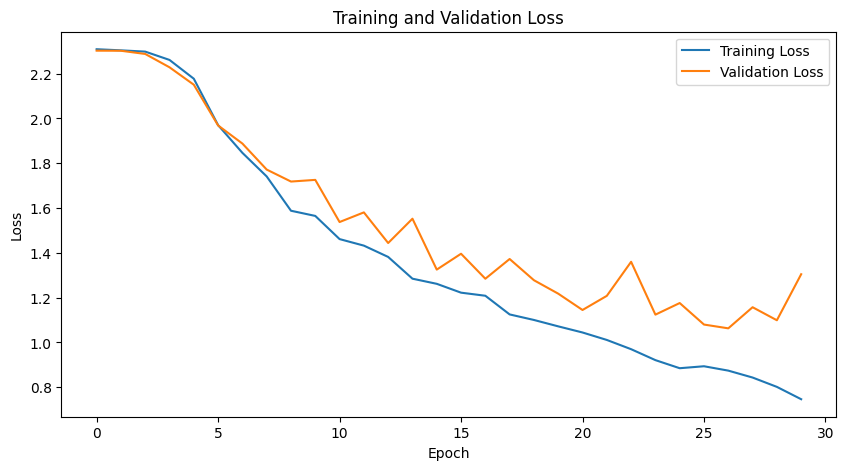

In [13]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


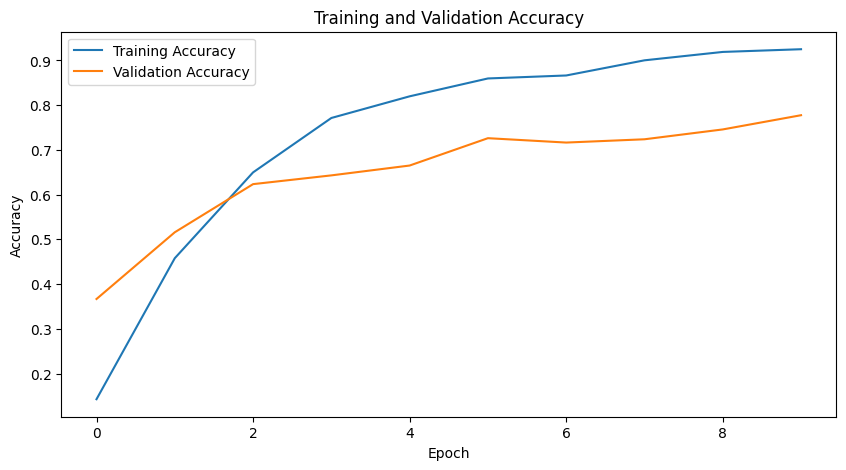

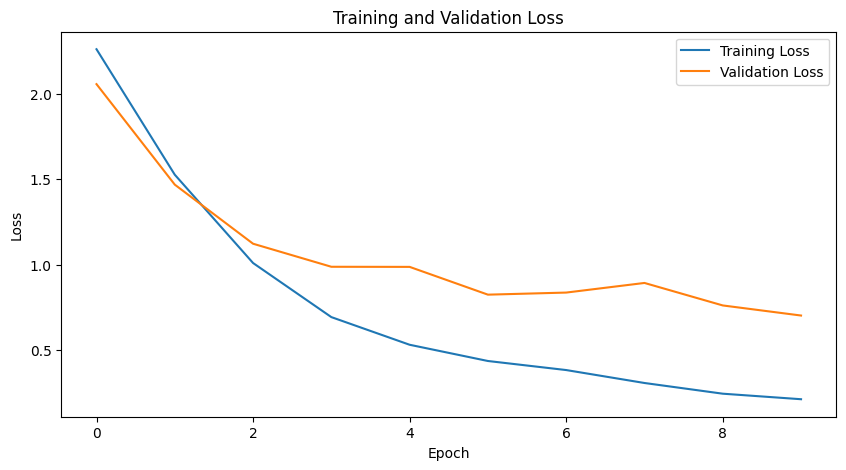

In [6]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot training & validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


In [7]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Get true labels and predictions for test data
test_labels = []
test_preds = []
for filename in os.listdir(test_folder):
    if filename.lower().endswith(".jpg"):
        img_path = os.path.join(test_folder, filename)
        true_label = int(filename[0])  # Assuming label is the first character in the filename
        test_labels.append(true_label)
        test_preds.append(predict_image(img_path))

# Print classification report
print(classification_report(test_labels, test_preds, target_names=[str(i) for i in range(10)]))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x2dedd0720>

In [ ]:
test_image_path = "/Users/gurpreetsingh/Desktop/Hackathon/Test_Dataset_JPG/5.jpg"  # Ensure this image path exists
predict_image(test_image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted Class: 8


In [15]:
pip install pymongo

Note: you may need to restart the kernel to use updated packages.


In [49]:
import os
from tensorflow.keras.preprocessing import image
import numpy as np
import tensorflow as tf

test_folder = "/Users/gurpreetsingh/Desktop/Hackathon/Data/8"

for filename in os.listdir(test_folder):
    if filename.lower().endswith(".jpg"):
        img_path = os.path.join(test_folder, filename)
        predicted_class = predict_image(img_path)
        print(f"Image: {filename} - Predicted Class: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
Predicted Class: 8
Image: IMG_4514.JPG - Predicted Class: None
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Predicted Class: 8
Image: IMG_5150.JPG - Predicted Class: None
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Predicted Class: 8
Image: IMG_4702.JPG - Predicted Class: None
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Predicted Class: 8
Image: IMG_5420.JPG - Predicted Class: None
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Predicted Class: 8
Image: IMG_4474.JPG - Predicted Class: None
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Predicted Class: 8
Image: IMG_5025.JPG - Predicted Class: None
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted Class: 8
Image: IMG_5794.JPG - Predicted Class: None
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Predicted Class: 8
Image: IMG_5958.JPG - Predicted Class: None
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Predicted Class: 8
Image: IMG_5970.JPG - Predicted Class: None
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Predicted Class: 8
Image: IMG_4844.JPG - Predicted C

In [57]:
import os
from tensorflow.keras.preprocessing import image
import numpy as np
import tensorflow as tf

test_folder = "/Users/gurpreetsingh/Desktop/Hackathon/Test_Dataset_jpg"
a=0
for filename in os.listdir(test_folder):
    print(a+1)
    a=a+1
    if filename.lower().endswith(".jpg"):
        img_path = os.path.join(test_folder, filename)
        predicted_class = predict_image(img_path)
        print(f"Image: {filename} - Predicted Class: {predicted_class}")

1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Predicted Class: 3
Image: 003.jpg - Predicted Class: None
2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Predicted Class: 3
Image: 001.jpg - Predicted Class: None
3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Predicted Class: 0
Image: 000.jpg - Predicted Class: None
4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Predicted Class: 2
Image: 09909.jpg - Predicted Class: None
5
6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Predicted Class: 1
Image: 005.jpg - Predicted Class: None
7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Predicted Class: 2
Image: 9.jpg - Predicted Class: None
8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Predicted Class: 1
Image: 00.jpg - Predicted Class: None
9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Predicted Class: 2
Image: 060.jpg - Predicted Class: None
10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Predicted Class: 1
Image: 01.jpg - Predicted Class: None
11
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Predicted Class: 1
Image: 03.jpg - Predicted Class: None
12
1/1 ━━━━━━━━━━━━

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x126f2e020>